In [5]:
import heapq
from random import randint
import matplotlib.pyplot as plt
import numpy as np

class Server:
    def __init__(self, speed):
        self.speed = speed
        self.tasks = []
        self.finish_time = 0

    def schedule_task(self, task, start_time=0):
        task_time = task / self.speed
        if start_time > self.finish_time:
            start_time = start_time  # Wait until start time to begin task
        else:
            start_time = self.finish_time  # Start after finishing last task
        end_time = start_time + task_time
        self.finish_time = end_time
        self.tasks.append((task, start_time, end_time))

    def __lt__(self, other):
        return self.finish_time < other.finish_time

class Job:
    def __init__(self, reduce_tasks):
        self.reduce_tasks = reduce_tasks

    @staticmethod
    def generate_job(num_reduce, max_task_size):
        reduce_tasks = [randint(1, max_task_size) for _ in range(num_reduce)]
        return Job(reduce_tasks)

def large_reduce_first(servers, jobs):
    # Sort all reduce tasks from all jobs by descending size
    all_reduce_tasks = sorted(
        (task for job in jobs for task in job.reduce_tasks), reverse=True
    )
    # Assign the largest tasks to each server
    for server, task in zip(sorted(servers, key=lambda x: x.speed, reverse=True), all_reduce_tasks):
        server.schedule_task(task)

    # Assign remaining tasks to the fastest available server
    for task in all_reduce_tasks[len(servers):]:
        fastest_server = min(servers, key=lambda x: x.finish_time)
        fastest_server.schedule_task(task)

In [104]:
def online_large_reduce_first(servers, jobs):
    for job_index, job in enumerate(jobs):
        if job_index == 0:  # First job, schedule using LRF
            all_reduce_tasks = sorted(job.reduce_tasks, reverse=True)
            for server, task in zip(sorted(servers, key=lambda x: x.speed, reverse=True), all_reduce_tasks):
                server.schedule_task(task)
            for task in all_reduce_tasks[len(servers):]:
                fastest_server = min(servers, key=lambda x: x.finish_time)
                fastest_server.schedule_task(task)
        else:
            # Schedule subsequent jobs as they arrive
            for task in sorted(job.reduce_tasks, reverse=True):
                earliest_server = min(servers, key=lambda x: x.finish_time + task / x.speed)
                earliest_server.schedule_task(task)

In [105]:
def simulate_olrf():
    num_servers = 5
    servers = [Server(speed=np.random.randint(5, 15)) for _ in range(num_servers)]
    jobs = [Job.generate_job(np.random.randint(5, 10), np.random.randint(50, 100)) for _ in range(5)]

    online_large_reduce_first(servers, jobs)
    return servers, jobs

In [106]:
def plot_schedule(servers, jobs):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(jobs)))

    for i, server in enumerate(servers):
        start_times = [task[1] for task in server.tasks]
        durations = [task[2] - task[1] for task in server.tasks]
        for j, (start, duration) in enumerate(zip(start_times, durations)):
            ax.bar(x=i, height=duration, bottom=start, width=1, color=colors[j % len(jobs)], edgecolor='white', label=f'Job {j+1} on Server {i+1}' if j == 0 else "")

    ax.set_ylabel('Time')
    ax.set_xlabel('Server')
    ax.set_xticks(range(len(servers)))
    ax.set_xticklabels([f"Server {i+1}" for i in range(len(servers))])
    ax.set_title('Task Scheduling on Servers')
    # ax.legend(title="Jobs on Servers")

    plt.show()

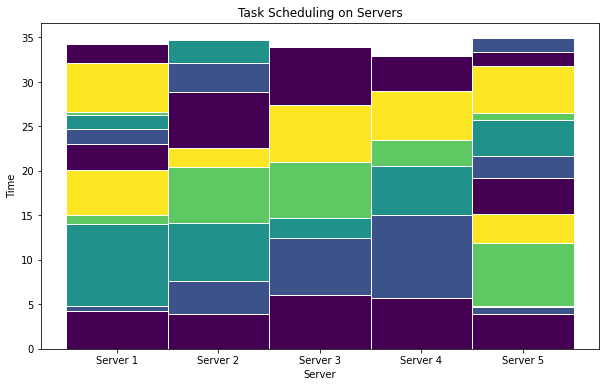

In [107]:
servers, jobs = simulate_olrf()
plot_schedule(servers=servers, jobs=jobs)

In [108]:
def calculate_n(i):
    if i == 0:
        return 1
    else:
        return sum(2**(i-j) * calculate_n(j) for j in range(i))

def get_bad_input_for_online(max_n):
    servers = []
    jobs = []

    for i in range(max_n + 1):
        n = calculate_n(i)
        speed = 1 / (2 ** i)
        task_size = 1 / (2 ** i)

        servers.extend([Server(speed) for _ in range(n)])
        jobs.append(Job([task_size] * n))

    # Reverse the jobs to simulate the intended arrival order
    jobs = list(reversed(jobs))
    return servers, jobs

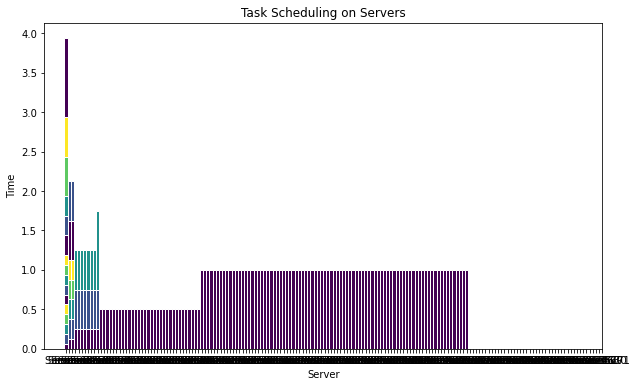

In [126]:
servers, jobs = get_bad_input_for_online(4)

online_large_reduce_first(servers, jobs)

plot_schedule(servers=servers, jobs=jobs)

In [120]:
def get_makespan(servers):
    return max(server.finish_time for server in servers)

SIM_MAX = 8
makespans = []

for i in range(1, SIM_MAX + 1):
    servers, jobs = get_bad_input_for_online(i)
    online_large_reduce_first(servers, jobs)
    makespan = get_makespan(servers)
    makespans.append(makespan)

print(makespans)

[1.5, 2.25, 3.125, 3.9375, 4.34375, 4.859375, 5.6796875, 6.30859375]


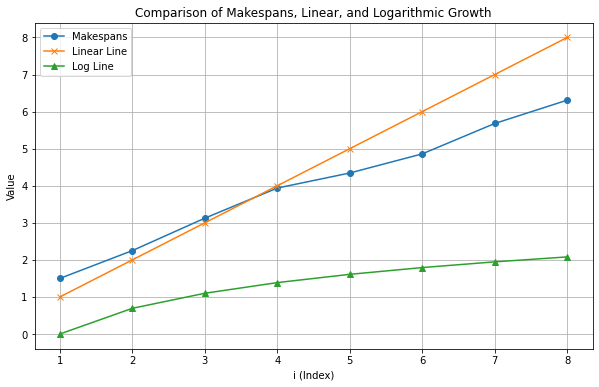

In [124]:
import matplotlib.pyplot as plt
import numpy as np

x_values = range(1, SIM_MAX + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, makespans, label='Makespans', marker='o')  # Plot makespans

linear_line = x_values
plt.plot(x_values, linear_line, label='Linear Line', marker='x')  # Linear plot

log_line = [np.log(x) for x in x_values]
plt.plot(x_values, log_line, label='Log Line', marker='^')  # Logarithmic plot

plt.xlabel('n (num of servers / jobs)')
plt.ylabel('Value')
plt.title('Comparison of Makespans, Linear, and Logarithmic Growth')
plt.legend()
plt.grid(True)
plt.show()


In [150]:
def get_makespan(servers):
    return max(server.finish_time for server in servers)

SIM_MAX = 8
makespans = []

for i in range(1, SIM_MAX + 1):
    servers, jobs = get_bad_input_for_online(i)
    online_large_reduce_first(servers, jobs)
    makespan = get_makespan(servers)
    makespans.append(makespan)

print(makespans)

[1.5, 2.25, 3.125, 3.9375, 4.34375, 4.859375, 5.6796875, 6.30859375]


In [151]:
len(servers)

43691

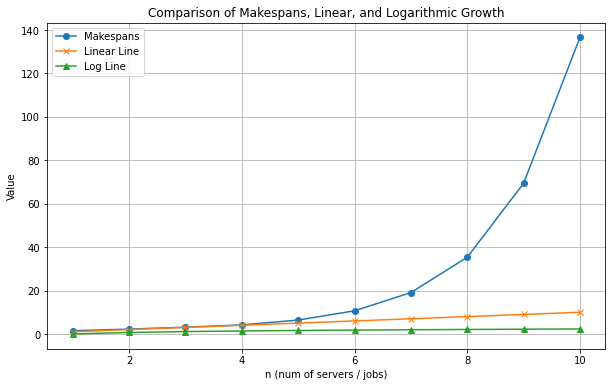

In [131]:
import matplotlib.pyplot as plt
import numpy as np

x_values = range(1, SIM_MAX + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_values, makespans, label='Makespans', marker='o')  # Plot makespans

linear_line = x_values
plt.plot(x_values, linear_line, label='Linear Line', marker='x')  # Linear plot

log_line = [np.log(x) for x in x_values]
plt.plot(x_values, log_line, label='Log Line', marker='^')  # Logarithmic plot

plt.xlabel('n (num of servers / jobs)')
plt.ylabel('Value')
plt.title('Comparison of Makespans, Linear, and Logarithmic Growth')
plt.legend()
plt.grid(True)
plt.show()


In [142]:
def get_makespan(servers):
    return max(server.finish_time for server in servers)

SIM_MAX = 5
makespans = []

for i in range(1, SIM_MAX + 1):
    servers, jobs = get_bad_input_for_online(i)
    servers= servers[:40]
    jobs = jobs[:10]
    online_large_reduce_first(servers, jobs)
    makespan = get_makespan(servers)
    makespans.append(makespan)

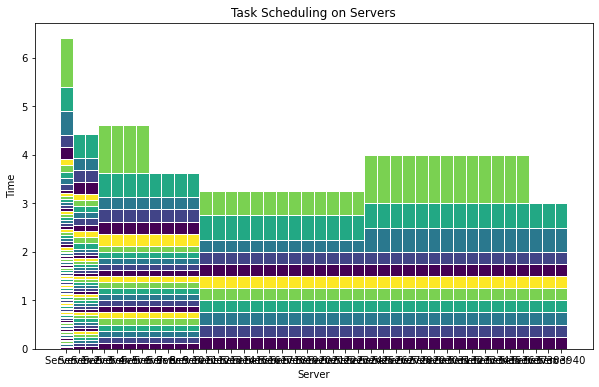

In [143]:

plot_schedule(servers=servers, jobs=jobs)

In [110]:
total_len = 0
for i in range(len(jobs)):
    total_len+=len(jobs[i].reduce_tasks)
    print(len(jobs[i].reduce_tasks))
total_len

128
32
8
2
1


171

In [111]:
len(servers)

171

In [112]:
for server in servers:
    print(server.speed)

for job in jobs:
    print(job.reduce_tasks)

1.0
0.5
0.5
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.125
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
